概要：上节学习了决策边界，本节学习softmax回归。

1.设置绘图环境。

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
2.softmax回归是就是多类别的Logistic回归，是Logistic回归的简单推广。

当给定一个实例x 时，Softmax 回归模型首先计算 k类的分数 $s_k(x)$，然
后将分数应用在 Softmax 函数（也称为归一化指数）上，估计出每类的概率。

样本属于第k个分类的得分：

$$ s_k(x) = \theta^T \cdot x $$

然后计算样本属于第k个分类的概率：

$$ \hat p_k = \sigma(s(x))_k = \frac{exp^{s_k(x)}}{\sum_{i=1}^K{exp^{s_i(x)}}} $$ 

In [ ]:
和 Logistic 回归分类器一样，Softmax 回归分类器将估计概率最高（它只是得分最高的类）的
那类作为预测结果：

$$ \hat y_k = argmax \; \hat p_k = argmax\; \sigma(s(x))_k = argmax\; s_k(x) = argmax\; (\theta^T \cdot x) $$

损失函数是：

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m{} \sum_{k=1}^K{ y_k^{(i)} log(\hat p_k^{(i)})} $$

如果对于第i 个实例的目标类是k ，那么$ y_k^{(i)} $ = 1，反之$ y_k^{(i)} $ = 0 。

这个损失函数关于$\theta_k$ 的梯度向量为公式：

$$ \nabla_{\theta_k}J(\theta) = \frac{1}{m} \sum_{i=1}^m{(\hat p_k^{(i)} - y_k^{(i)}) x^{(i)}} $$

现在你可以计算每一类的梯度向量，然后使用梯度下降（或者其他的优化算法）找到使得损
失函数达到最小值的参数矩阵$\theta$ 。

2.导入鸢尾花数据集。这是一个著名的数据集，其中包含 150 朵三种
不同的鸢尾花的萼片和花瓣的长度和宽度。这三种鸢尾花为：Setosa，Versicolor，
Virginica。

使用softmax回归，参数使用multi_class="multinomial",solver="lbfgs"：

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [17]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

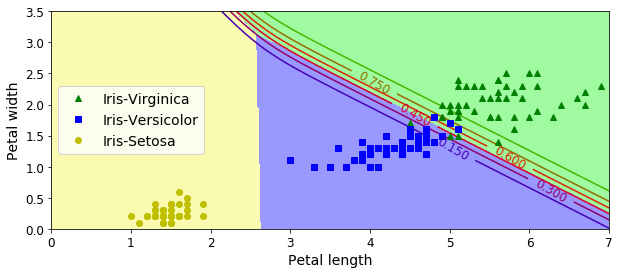

In [34]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
图中的等高线是类别是virginica的。